# Oceans visualization data

## [The blue acceleration](https://www.sciencedirect.com/science/article/pii/S2590332219302751) data

In [1]:
import numpy as np
import pandas as pd

In [4]:
def interpolate_to_months(file_name, init_year, end_year):
    df = pd.read_csv(f'../../../../../Earth_Dashboard/data/{file_name}', names=["time", "y"])
    
    time = pd.date_range(str(init_year), str(end_year), freq='MS', name="time")
    new_x = np.linspace(init_year, end_year, (end_year-init_year)*12+1)
    new_y = np.interp(new_x, df.time, df.y)
    
    return pd.DataFrame({'time': time[:-1], 'values': new_y[:-1]})

**Interpolate datasets to months**

In [3]:
datasets = {'wild-capture': [1950, 2018],
            'a-marine-aquaculture': [1950, 2018],
            'b-deep-hydrocarbons': [1970, 2018],
            'c-deep-sea-minerals':[1970,2018],
            'd-desalinated-seawater':[1970,2018],
            'g-shipping':[1970,2018],
            'h-submarine-cables':[1988,2018],
            'i-cruise-tourism':[1970,2018],
            'j-offshore-windfarms':[1990,2018],
            'k-marine-protected-areas':[1970,2018],
            'f-world-ocean-database':[1970,2018],
            'e-marine-genetic-resources':[1970,2018],   
           }

In [ ]:
for file_name, years in datasets.items():
    df = interpolate_to_months(file_name+'.csv', years[0], years[1])
    df.to_csv(f'../../../../../Earth_Dashboard/data/{file_name}_new.csv')

In [221]:
df

,time,values
0,1970-01-01,-0.063694
1,1970-02-01,-0.063694
2,1970-03-01,-0.063694
3,1970-04-01,-0.063694
4,1970-05-01,-0.063694
...,...,...
571,2017-08-01,28.925690
572,2017-09-01,29.061571
573,2017-10-01,29.197452
574,2017-11-01,29.333333


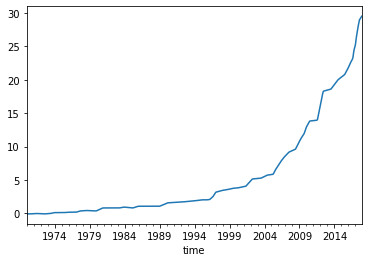

In [222]:
#import matplotlib.pyplot as plt
df.plot(x='time',legend=False)
#plt.axis("off")

In [223]:
df.time

0     1970-01-01
1     1970-02-01
2     1970-03-01
3     1970-04-01
4     1970-05-01
         ...    
571   2017-08-01
572   2017-09-01
573   2017-10-01
574   2017-11-01
575   2017-12-01
Name: time, Length: 576, dtype: datetime64[ns]

In [4]:
import matplotlib.pyplot as plt
import datetime as dt

def plot_and_save(file_name):
    df= pd.read_csv(f'../../../../../Earth_Dashboard/data/{file_name}_new.csv')
    df['time']=pd.to_datetime(df['time'])
    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(5, 5))

    # Add x-axis and y-axis
    ax.plot(df.time,df['values'],color='steelblue',linewidth=4)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)
    ax.set_xlim([dt.datetime(1970, 1, 1), dt.datetime(2020, 1, 1)])
    ax.set_ylim(bottom=0)
    
    #Comment for _line
    #ax.axis('off')
    
    #Comment for _axis
    ax.axvline(dt.datetime(2000, 1, 1),ymin=0, ymax=1,color='lightblue',linestyle='dashed')

    # Set title and labels for axes
    #ax.set(title=f'{file_name}')

    plt.show()
    fig.savefig(f'../../../../../Earth_Dashboard/data/{file_name}_axis.png',dpi=100,transparent=True)

In [233]:
datasets.keys()

dict_keys(['wild-capture', 'a-marine-aquaculture', 'b-deep-hydrocarbons', 'c-deep-sea-minerals', 'd-desalinated-seawater', 'g-shipping', 'h-submarine-cables', 'i-cruise-tourism', 'j-offshore-windfarms', 'k-marine-protected-areas'])

In [ ]:
for i in datasets.keys():
    plot_and_save(i)

### * repeat with real values provided from RW

In [187]:
import matplotlib.pyplot as plt
import datetime as dt

df= pd.read_excel(r'../../../../../Earth_Dashboard/BlueAcceleration_data.xlsx')
def plot_and_save(pressure):
    df['Year'] =pd.to_datetime(df.Year, format='%Y')
    # Create figure and plot space
    fig, ax = plt.subplots(figsize=(5, 5))

    # Add x-axis and y-axis
    ax.plot(df['Year'],df[pressure],color='steelblue',linewidth=4)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)
    ax.set_xlim([dt.datetime(1970, 1, 1), dt.datetime(2020, 1, 1)])
    ax.set_ylim(bottom=0)
    
    #Comment for _line
    #ax.axis('off')
    
    #Comment for _axis
    ax.axvline(dt.datetime(2000, 1, 1),ymin=0, ymax=1,color='lightblue',linestyle='dashed')

    # Set title and labels for axes
    #ax.set(title=f'{file_name}')

    plt.show()
    fig.savefig(f'../../../../../Earth_Dashboard/data/{pressure[0:20]}_axis.svg',dpi=100,transparent=True,format="svg")

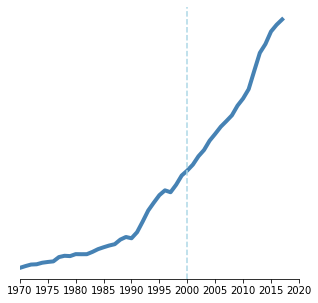

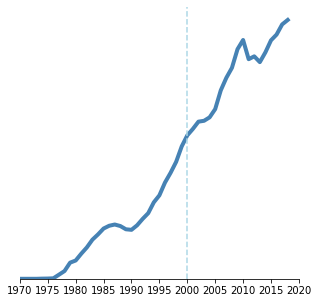

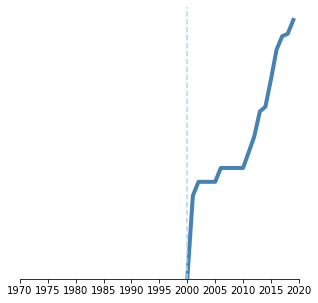

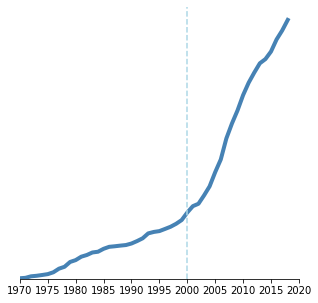

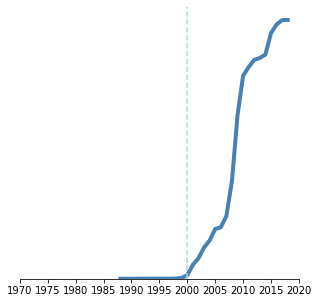

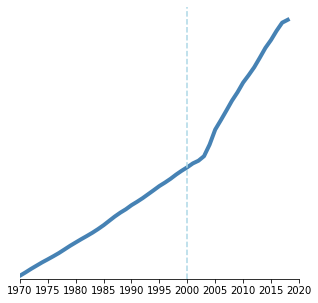

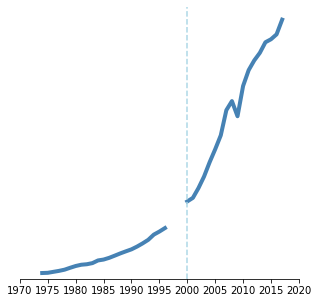

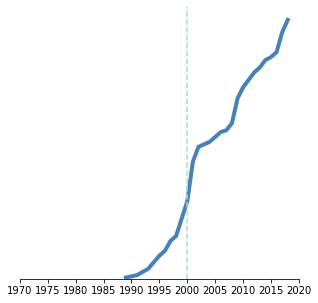

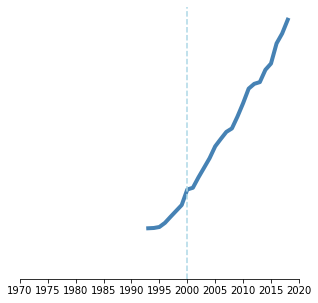

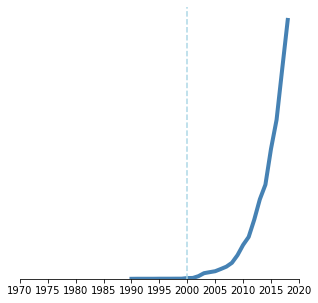

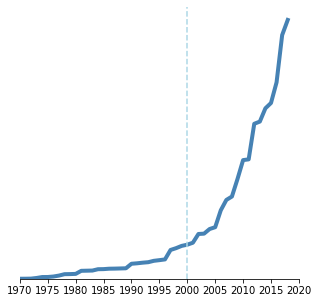

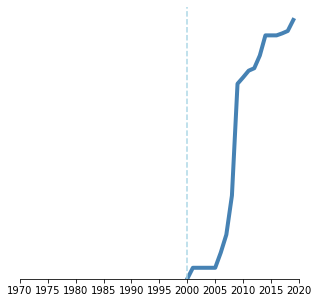

In [188]:
for pressure in df.columns[1:15]:
    plot_and_save(pressure)

In [67]:
### Calculate %increase
def percent_increase(file_name):
    df= pd.read_csv(f'../../../../../Earth_Dashboard/data/{file_name}_new.csv')
    df['time']=pd.to_datetime(df['time'])
    begin_idx=df[df['time']==dt.datetime(2000, 1, 1)].index.values.astype(int)[0]
    begin=df.loc[begin_idx]['values']
    end=df.loc[len(df)-1]['values']
    #tend=df.loc[len(df)-1]['time']
    perIncrease=(end-begin)/begin*100
    print(f'{file_name} has increased {round(perIncrease,2)}% from 2000 to 2017')

In [6]:
for i in datasets.keys():
    percent_increase(i)

wild-capture has increased -4.01% from 2000 to 2017
a-marine-aquaculture has increased 145.87% from 2000 to 2017
b-deep-hydrocarbons has increased 84.39% from 2000 to 2017
c-deep-sea-minerals has increased 38618.21% from 2000 to 2017
d-desalinated-seawater has increased 305.97% from 2000 to 2017
g-shipping has increased 258.5% from 2000 to 2017
h-submarine-cables has increased 235.28% from 2000 to 2017
i-cruise-tourism has increased 185.02% from 2000 to 2017
j-offshore-windfarms has increased 22980.31% from 2000 to 2017
k-marine-protected-areas has increased 674.35% from 2000 to 2017
f-world-ocean-database has increased 136.79% from 2000 to 2017
e-marine-genetic-resources has increased 8476.97% from 2000 to 2017


### * repeat with real values provided from RW

In [183]:
### Calculate %increase
df= pd.read_excel(r'../../../../../Earth_Dashboard/BlueAcceleration_data.xlsx')
def percent_increase(pressure):
    df= pd.read_excel(r'../../../../../Earth_Dashboard/BlueAcceleration_data.xlsx')
    df['Year'] =pd.to_datetime(df.Year, format='%Y')
    df = df[['Year',pressure]].dropna()
    begin_idx=df[(df['Year'] > dt.datetime(1999, 1, 1)) & (df[pressure] >0)].index.values.astype(int)[0]
    begin=df.loc[begin_idx][pressure]
    end_idx=df[(df['Year'] == dt.datetime(2017, 1, 1)) & (df[pressure] >0)].index.values.astype(int)[0]
    end=df.loc[end_idx][pressure]
    perIncrease=(end-begin)/begin*100
    print(f'{pressure} has increased {round(perIncrease,2)}% from 2000 to 2017')

In [184]:
for colname in df.columns[1:15]:
    percent_increase(pressure =colname)

Marine aquaculture (million tonnes) has increased 139.55% from 2000 to 2017
Deep hydrocarbons (million barrels/day) has increased 77.37% from 2000 to 2017
Deep-sea minerals (million km2) has increased 191.82% from 2000 to 2017
Desalinated seawater (million m3/day) has increased 274.54% from 2000 to 2017
Marine genetic resources (number of sequences) has increased 7093.44% from 2000 to 2017
World Ocean Database (million of casts) has increased 129.65% from 2000 to 2017
Shipping (million TEU) has increased 234.87% from 2000 to 2017
Submarine cables (million km) has increased 217.87% from 2000 to 2017
Cruise tourism (million passengers) has increased 174.69% from 2000 to 2017
Offshore windfarms (thousand megawatts) has increased 28011.9% from 2000 to 2017
Marine protected areas (million km2) has increased 614.47% from 2000 to 2017
Extended continental shelf (million km2) has increased 2127.01% from 2000 to 2017


## [Return of investement](https://oceanpanel.org/sites/default/files/2020-07/Ocean%20Panel_Economic%20Analysis_FINAL.pdf) data 
(page 5 of report)

In [237]:
### Return of investement
sust = [ ('Conservation & restoration of mangroves', 3 , 0.2) ,
             ('Decarbonization of international shipping', 4  , 5.1) ,
             ('Sustainable ocean-based food production', 10 , 6.7) ,
             ('Offshore wind energy production', 12, 3.5)]
#Create a DataFrame object
df = pd.DataFrame(sust, columns = ['Intervention' , 'BC', 'net_benefit_td']) 
df.head()

,Intervention,BC,net_benefit_td
0,Conservation & restoration of mangroves,3,0.2
1,Decarbonization of international shipping,4,5.1
2,Sustainable ocean-based food production,10,6.7
3,Offshore wind energy production,12,3.5


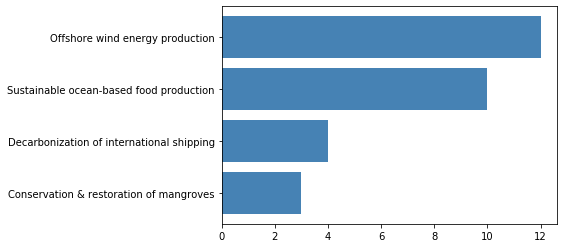

In [252]:
y_pos = np.arange(len(df.Intervention))
height =df.BC
 
# Create horizontal bars
plt.barh(y_pos, height, color='steelblue')
plt.yticks(y_pos, df.Intervention)
plt.savefig(f'../../../../../Earth_Dashboard/data/return.png',dpi=300,transparent=True)

## Maritime boundaries

In [11]:
import geopandas as gpd
import pandas as pd
marine = gpd.read_file('../../../../../Earth_Dashboard/EEZ_land_union_v3_202003/EEZ_Land_v3_202030.shp')

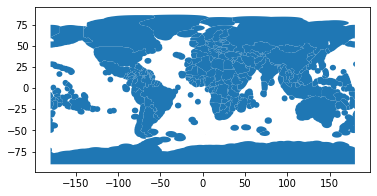

In [12]:
marine.plot()

In [29]:
land =gpd.read_file('../../../../../Earth_Dashboard/Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')

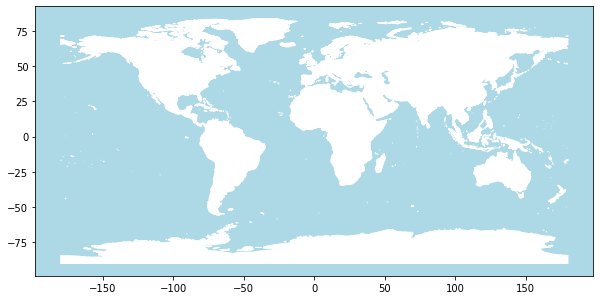

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
land.plot(ax=ax,color='white',edgecolor='white')
ax.set_facecolor('lightblue')
plt.show()

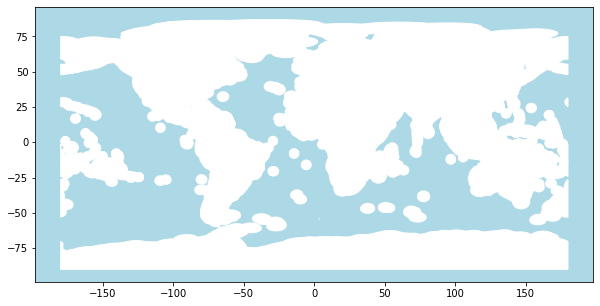

In [27]:
land = land.to_crs(marine.crs)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_facecolor('lightblue')
marine.plot(ax=ax, color='white', edgecolor='white')
#land.plot(ax=ax, color='white')

plt.show()

## Ocean Health index

In [13]:
ohi =gpd.read_file('../../../../../Earth_Dashboard/Intersect_EEZ_IHO_v4_2020/Intersect_EEZ_IHO_v4_2020.shp')
ohi_scores=pd.read_csv('../../../../../Earth_Dashboard/OHI_final_formatted_scores_2019-11-15.csv')

In [14]:
ohi.head(2)

,fid,MRGID,MARREGION,MRGID_IHO,IHO_SEA,MRGID_EEZ,EEZ,MRGID_TER1,TERRITORY1,ISO_TER1,...,ISO_TER3,UN_TER3,MRGID_SOV3,SOVEREIGN3,ISO_SOV3,UN_SOV3,AREA_KM2,X_1,Y_1,geometry
0,1.0,25614,Albanian part of the Adriatic Sea,3314,Adriatic Sea,5670,Albanian Exclusive Economic Zone,2153,Albania,ALB,...,None,0,0,None,None,0,12127,19.11030,40.93096,"POLYGON ((19.98580 39.74337, 19.95859 39.74320..."
1,2.0,25622,Albanian part of the Ionian Sea,3351,Ionian Sea,5670,Albanian Exclusive Economic Zone,2153,Albania,ALB,...,None,0,0,None,None,0,39,19.97118,39.69394,"POLYGON ((20.00835 39.69182, 20.00810 39.69187..."


In [15]:
ohi_scores.head()

,scenario,goal,long_goal,dimension,region_id,region_name,value
0,2012,AO,Artisanal opportunities,future,0,Global average,79.53
1,2012,AO,Artisanal opportunities,future,1,Cocos Islands,100.00
2,2012,AO,Artisanal opportunities,future,2,Christmas Island,100.00
3,2012,AO,Artisanal opportunities,future,3,Norfolk Island,100.00
4,2012,AO,Artisanal opportunities,future,4,Macquarie Island,NaN


In [17]:
ohi_scores['long_goal'].unique() # we want index

array(['Artisanal opportunities', 'Biodiversity', 'Coastal protection',
       'Carbon storage', 'Clean water', 'Economies',
       'Fisheries (subgoal)', 'Food provision', 'Habitat (subgoal)',
       'Iconic species (subgoal)', 'Index', 'Livelihoods & economies',
       'Livelihoods', 'Lasting special places (subgoal)',
       'Mariculture (subgoal)', 'Natural products', 'Sense of place',
       'Species condition (subgoal)', 'Tourism & recreation'],
      dtype=object)

In [22]:
ohi2019= ohi_scores[(ohi_scores['scenario']==2019) & (ohi_scores['long_goal']=='Index')]
ohi2019.head()

,scenario,goal,long_goal,dimension,region_id,region_name,value
183852,2019,Index,Index,future,0,Global average,72.83
183853,2019,Index,Index,future,1,Cocos Islands,85.59
183854,2019,Index,Index,future,2,Christmas Island,88.83
183855,2019,Index,Index,future,3,Norfolk Island,86.62
183856,2019,Index,Index,future,4,Macquarie Island,82.34


In [27]:
ohi_t = ohi.merge(ohi2019, left_on='TERRITORY1',right_on='region_name',how='outer')
ohi_t.head()
ohi_s = ohi_t[['region_name','value','geometry']]

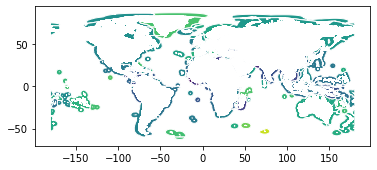

In [34]:
ohi_s.plot(column='value',legend=True)

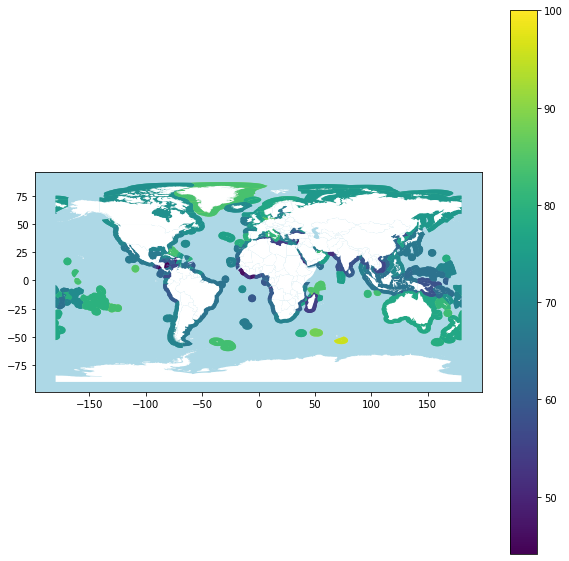

In [35]:
land = land.to_crs(ohi.crs)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_facecolor('lightblue')
ohi_s.plot(ax=ax,column='value',legend=True)
land.plot(ax=ax, color='white')

plt.show()

## Plastic Waste in Rivers
Create list widget that shows `Rivers emitting the most plastic into the ocean`

In [42]:
import json
import getpass
import requests
import shapely.wkb 
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
def get_token(email):
    api_url = 'http://api.resourcewatch.org'
    password = getpass.getpass('Resource Watch login password:')

    payload = {
        "email": f"{email}",
        "password": f"{password}"
    }

    url = f'{api_url}/auth/login'

    headers = {'Content-Type': 'application/json'}

    r = requests.post(url, data=json.dumps(payload), headers=headers)
    
    return r.json().get('data').get('token')

In [4]:
token = get_token(email='iker.sanchez@vizzuality.com')

Resource Watch login password: ·········


**df_from_carto**

In [12]:
def df_from_carto(account, query):
    """
    It gets data by querying a carto table and converts it into a GeoDataFrame.
    """
    urlCarto = f"https://{account}.carto.com/api/v2/sql"
    
    sql = {"q": query}
    r = requests.get(urlCarto, params=sql)
    
    data = r.json()
    
    df = gpd.GeoDataFrame(data.get("rows"))
    if 'the_geom' in df.columns:
        # Change geometry from WKB to WKT format
        df['geometry'] = df.apply(lambda x: shapely.wkb.loads(x['the_geom'],hex=True), axis=1 )
        df.drop(columns='the_geom', inplace=True)
        if 'the_geom_webmercator' in df.columns:
            df.drop(columns=['the_geom_webmercator'], inplace=True)
        df.crs = {'init': 'epsg:4326'}
        df = df.to_crs({'init': 'epsg:4326'})
        
    return df

In [37]:
account = 'wri-rw'

query = "SELECT the_geom, mpw FROM wat_063_plasticriverinputs ORDER BY mpw DESC LIMIT 5"

urlCarto = f"https://{account}.carto.com/api/v2/sql"

sql = {"q": query}
r = requests.get(urlCarto, params=sql)
r.url

'https://wri-rw.carto.com/api/v2/sql?q=SELECT+the_geom%2C+mpw+FROM+wat_063_plasticriverinputs+ORDER+BY+mpw+DESC+LIMIT+5'

In [40]:
account = 'wri-rw'

query = "SELECT the_geom, mpw FROM wat_063_plasticriverinputs ORDER BY mpw DESC LIMIT 100"

df = df_from_carto(account, query)

/Users/ikersanchez/anaconda3/envs/geoenv/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [18]:
seas = gpd.read_file('../data/World_Seas_IHO_v3/World_Seas_IHO_v3.shp')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
seas.plot(ax=ax,color='white',edgecolor='white')
df.plot(ax=ax, column='mpw', markersize=df['mpw']*1e-7,legend=True)
ax.set_aspect('equal')
ax.set_facecolor('lightblue')
plt.show()

**Top 20 polluting rivers**

In [43]:
rivers = gpd.read_file('../data/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp')

In [232]:
rivers_20 = rivers[rivers['name'].isin(['Yangtze', 'Ganges', 'Xi', 'Huangpu', 'Cross', 'Brantas', 'Amazonas',
                           'Pasig', 'Irrawaddy', 'Solo', 'Mekong', 'Imo', 'Dong', 'Serayu', 'Magdalena',
                           'Tamsui', 'Zhujiang', 'Hanjiang', 'Progo', 'Kwa Ibo'])]

In [233]:
#rivers_20 = rivers_20.set_crs("EPSG:8857", allow_override=True)
rivers_20.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [234]:
rivers_20.to_file('../data/rivers_20/rivers_20.shp')

**World rivers**

In [152]:
rivers_world = gpd.read_file('../data/rivers_world_47950/rivers_world_47950.shp')

**Cross**

In [235]:
cross = rivers_world[rivers_world['SUB_NAME'].isin(['Cross 1', 'Cross 2', 'Cross 3'])]
#cross = cross.set_crs("EPSG:8857", allow_override=True)
cross.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [236]:
cross.to_file('../data/cross/cross.shp')

**Yangtze**

In [237]:
yangtze = rivers_world[rivers_world['MAJ_NAME'].str.contains('Yangtze')]
#yangtze = yangtze.set_crs("EPSG:8857", allow_override=True)
yangtze.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [238]:
yangtze.to_file('../data/yangtze/yangtze.shp')

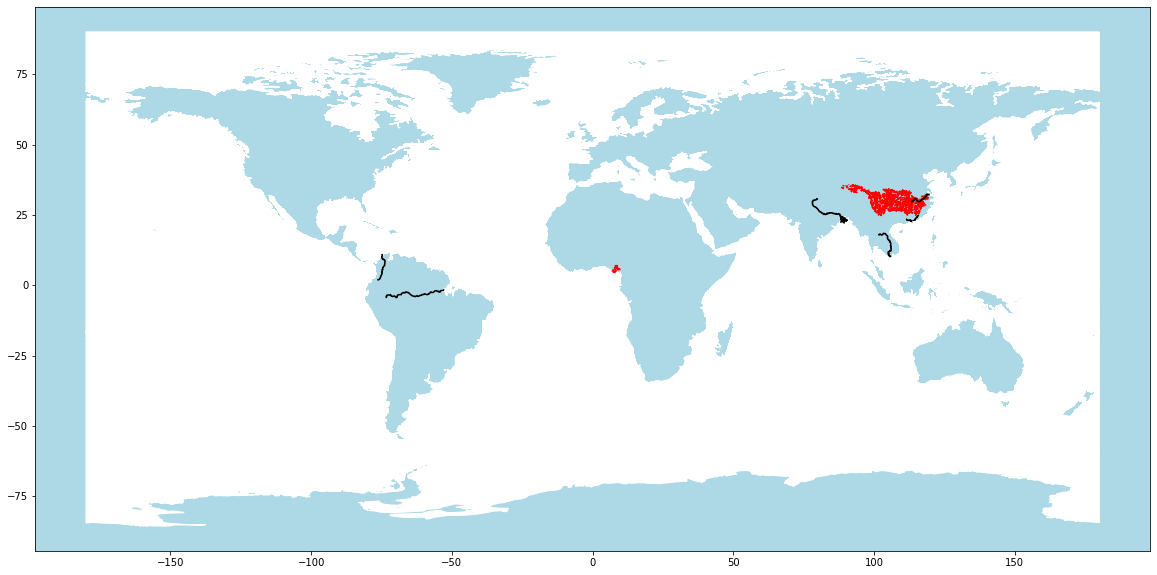

In [224]:
fig, ax = plt.subplots(figsize=(20,10))
seas.plot(ax=ax,color='white',edgecolor='white')
yangtze.plot(ax=ax, color='r')
rivers_20.plot(ax=ax, color='k')
cross.plot(ax=ax, color='r')
ax.set_aspect('equal')
ax.set_facecolor('lightblue')
plt.show()

In [54]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM

In [55]:
drawing = svg2rlg('../data/world.svg')
renderPM.drawToFile(drawing, '../data/world.png', fmt="PNG")